# In Class Notebook, Week 06

You can click on the GitHub URL of this notebook to access the file in near-real time: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2024/blob/master/week06/inClass_week06.ipynb 

Or you can copy-paste into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

## Hints for HW3

In [1]:
import pandas as pd

In [2]:
bf = pd.read_csv('https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/bfro_reports_fall2022.csv',
                parse_dates = ['date'])

In [3]:
bf.head()

observed  \
0  Ed L. was salmon fishing with a companion in P...   
1  heh i kinda feel a little dumb that im reporti...   
2  I was on my way to Claremont from Lebanon on R...   
3  I was northeast of Macy Nebraska along the Mis...   
4  While this incident occurred a long time ago, ...   

                                    location_details  \
0                  East side of Prince William Sound   
1  the road is off us rt 80, i dont know the exit...   
2  Close to Claremont down 120 not far from Kings...   
3      Latitude & Longitude :  42.158230  -96.344197   
4  Ward County, Just outside of a the Minuteman T...   

                           county          state  season  \
0  Valdez-Chitina-Whittier County         Alaska    Fall   
1                   Warren County     New Jersey    Fall   
2                 Sullivan County  New Hampshire  Summer   
3                 Thurston County       Nebraska  Spring   
4                     Ward County   North Dakota  Spring   

                                               title  latitude  longitude  \
0                                                NaN       NaN        NaN   
1                                                NaN       NaN        NaN   
2  Report 55269: Dawn sighting at Stevens Brook o...  43.41549  -72.33093   
3  Report 59757: Possible daylight sighting of a ...  42.15685  -96.34203   
4  Report 751: Hunter describes described being s...  48.25422 -101.31660   

        date   number  ... precip_intensity precip_probability  precip_type  \
0        NaT   1261.0  ...              NaN                NaN          NaN   
1        NaT    438.0  ...              NaN                NaN          NaN   
2 2016-06-07  55269.0  ...            0.001                0.7         rain   
3 2018-05-25  59757.0  ...            0.000                0.0          NaN   
4 2000-04-21    751.0  ...              NaN                NaN         rain   

   pressure                            summary  uv_index  visibility  \
0       NaN                                NaN       NaN         NaN   
1       NaN                                NaN       NaN         NaN   
2    998.87  Mostly cloudy throughout the day.       6.0        9.70   
3   1008.07      Partly cloudy in the morning.      10.0        8.25   
4   1011.47       Partly cloudy until evening.       6.0       10.00   

   wind_bearing  wind_speed                                      location  
0           NaN         NaN                                           NaN  
1           NaN         NaN                                           NaN  
2         262.0        0.49  POINT(-72.33093000000001 43.415490000000005)  
3         193.0        3.33            POINT(-96.34203000000001 42.15685)  
4         237.0       11.14           POINT(-101.3166 48.254220000000004)  

[5 rows x 29 columns]

Check out downsampling for large datasets in the prep notebook.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

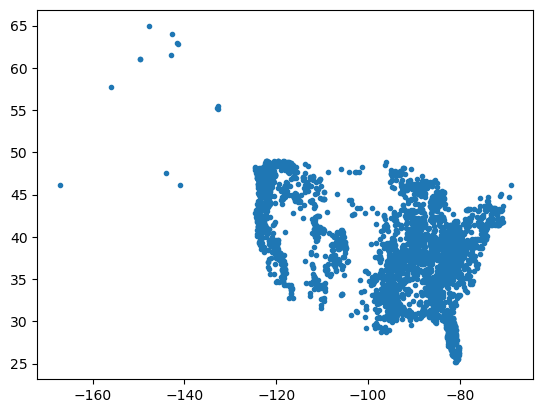

In [5]:
plt.plot(bf['longitude'], bf['latitude'], '.')

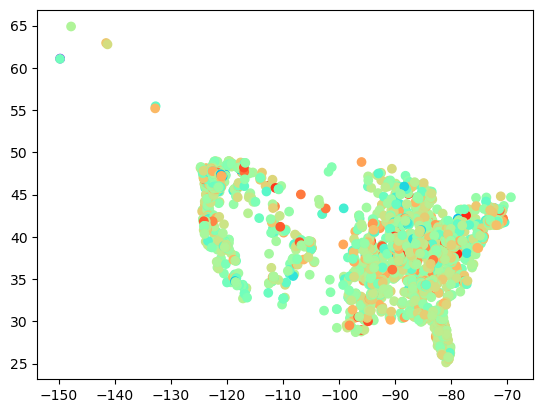

In [6]:
plt.scatter(bf['longitude'], bf['latitude'], c=np.log10(bf['pressure']), cmap='rainbow')

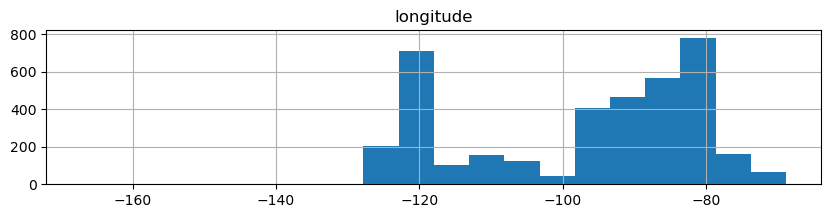

In [7]:
fig, ax = plt.subplots(figsize=(10,2))
bf.hist(column='longitude', ax=ax, bins=20)
plt.show()

## Review of ipywidgets

In [8]:
import ipywidgets

In [9]:
islider = ipywidgets.IntSlider(min=0,max=10,step=1,orientation='vertical')
islider

IntSlider(value=0, max=10, orientation='vertical')

In [10]:
cp = ipywidgets.ColorPicker()
cp

ColorPicker(value='black')

In [11]:
ipywidgets.link( (cp, 'value'), (islider.style, 'handle_color') )

In [12]:
class MyObject():
    name = 'unnamed'
    age = 0

In [13]:
my_obj = MyObject()

In [14]:
my_obj.name

'unnamed'

In [15]:
my_obj.age

0

In [16]:
my_obj.name = 'Bob'
my_obj.age = 47

In [17]:
my_obj.name, my_obj.age

('Bob', 47)

In [18]:
import traitlets

In [19]:
# class MyObject():
#     name = 'unnamed'
#     age = 0

class MyTraitletsObject(traitlets.HasTraits):
    name = traitlets.Unicode('unnamed')
    age = traitlets.Int(0)

In [20]:
my_t_obj = MyTraitletsObject()
my_t_obj.name = 'Bob'
my_t_obj.age = 47

In [21]:
my_t_obj.name, my_t_obj.age

('Bob', 47)

In [22]:
def name_changed(change):
    print(change)

my_t_obj.observe(name_changed, ['name'])
# .observe is similar to .on_click we used for buttons
# 'name' here is the trait we want to watch

In [23]:
my_t_obj.name = 'Linda'

{'name': 'name', 'old': 'Bob', 'new': 'Linda', 'owner': <__main__.MyTraitletsObject object at 0x16e77a650>, 'type': 'change'}


In [24]:
def name_change2(change):
    #print('Hello my name is', change['owner'].name, 'and I am', change['owner'].age, 'years old.')
    print('Hello my name is', change['new'], 'and I am', change['owner'].age, 'years old.')

my_t_obj.observe(name_change2, ['name'])

In [25]:
my_t_obj.name = 'Bob'

{'name': 'name', 'old': 'Linda', 'new': 'Bob', 'owner': <__main__.MyTraitletsObject object at 0x16e77a650>, 'type': 'change'}
Hello my name is Bob and I am 47 years old.


In [26]:
my_t_obj.unobserve(name_changed, ['name'])

In [27]:
my_t_obj.name = 'Linda'

Hello my name is Linda and I am 47 years old.


In [28]:
# try with changing age
def age_change(change):
    print('Hello my name is', change['owner'].name, 'and I am', change['new'], 'years old.')

my_t_obj.observe(age_change, ['age'])

In [29]:
my_t_obj.age = 45

Hello my name is Linda and I am 45 years old.


In [30]:
my_t_obj.name = 'Linda'

# Bqplot intro

In [31]:
import bqplot

In [32]:
# 1. Data
x = np.arange(100)
y = np.random.random(100)

In [33]:
#x

In [34]:
#y

In [35]:
# 2. Scales
bqplot.LinearScale?

Init signature: bqplot.LinearScale(*args: 't.Any', **kwargs: 't.Any') -> 't.Any'
Docstring:     
A linear scale.

An affine mapping from a numerical domain to a numerical range.

Attributes
----------
min: float or None (default: None)
    if not None, min is the minimal value of the domain
max: float or None (default: None)
    if not None, max is the maximal value of the domain
rtype: string (class-level attribute)
    This attribute should not be modified. The range type of a linear
    scale is numerical.
dtype: type (class-level attribute)
    the associated data type / domain type
precedence: int (class-level attribute, default_value=2)
    attribute used to determine which scale takes precedence in cases when
    two or more scales have the same rtype and dtype.
    default_value is 2 because for the same range and domain types,
    LinearScale should take precedence.
stabilized: bool (default: False)
    if set to False, the domain of the scale is tied to the data range
    if 

In [36]:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

In [37]:
# 3. Axis (sometimes will be marks, depending on how we are feeling!)
#bqplot.Axis?

In [38]:
ax_x = bqplot.Axis(scale=x_sc, label='X Value')
ax_y = bqplot.Axis(scale=y_sc, label='Y Value', orientation='vertical')

In [39]:
# 4. Marks (sometimes will swap with Axis)
#bqplot.Lines?
lines = bqplot.Lines(x=x, y=y, scales = {'x':x_sc, 'y':y_sc})

In [40]:
# 5. around here is where we would add interactivity

In [41]:
# 6. Put it all together as a figure
fig = bqplot.Figure(marks=[lines], axes=[ax_x, ax_y])
fig

Figure(axes=[Axis(label='X Value', scale=LinearScale(), side='bottom'), Axis(label='Y Value', orientation='ver…

One more time, but all together:

In [42]:
# 1. Data
x = np.arange(100)
y = np.random.random(100)

# 2. Scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# 3. Axis (sometimes will be marks, depending on how we are feeling!)
ax_x = bqplot.Axis(scale=x_sc, label='X Value')
ax_y = bqplot.Axis(scale=y_sc, label='Y Value', orientation='vertical')

# 4. Marks (sometimes will swap with Axis)
lines = bqplot.Lines(x=x, y=y, scales = {'x':x_sc, 'y':y_sc})

# 5. add in interactivity
pz = bqplot.interacts.PanZoom(scales = {'x':[x_sc], 'y':[y_sc]})

# 6. Put it all together as a figure
fig = bqplot.Figure(marks=[lines], axes=[ax_x, ax_y], interaction=pz)
fig

Figure(axes=[Axis(label='X Value', scale=LinearScale()), Axis(label='Y Value', orientation='vertical', scale=L…

In [43]:
bqplot.interacts.PanZoom?

Init signature: bqplot.interacts.PanZoom(*args: 't.Any', **kwargs: 't.Any') -> 't.Any'
Docstring:     
An interaction to pan and zoom wrt scales.

Attributes
----------
allow_pan: bool (default: True)
    Toggle the ability to pan.
allow_zoom: bool (default: True)
    Toggle the ability to zoom.
scales: Dictionary of lists of Scales (default: {})
    Dictionary with keys such as 'x' and 'y' and values being the scales in
    the corresponding direction (dimensions) which should be panned or
    zoomed.
Init docstring: Public constructor
File:           /opt/anaconda3/envs/DataViz2/lib/python3.10/site-packages/bqplot/interacts.py
Type:           MetaHasTraits
Subclasses:     

### Random scatter plot

In [44]:
# 1. Data
x = np.random.random(100)
y = np.random.random(100)

In [45]:
# 2. scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

In [46]:
# 3. axis
x_ax = bqplot.Axis(scale=x_sc, label='X')
y_ax = bqplot.Axis(scale=y_sc, label='Y', orientation = 'vertical')

In [47]:
#bqplot.Scatter?

In [48]:
# 4. marks
scatters = bqplot.Scatter(x=x, y=y, scales={'x':x_sc, 'y':y_sc})

In [49]:
# 5. interactivity -- just a moment!
#bqplot.interacts.FastIntervalSelector?
pz = bqplot.interacts.PanZoom(scales = {'x':[x_sc], 'y':[y_sc]})
selector = bqplot.interacts.FastIntervalSelector(scale=x_sc, marks=[scatters])

In [50]:
# 6. together as a figure
#fig = bqplot.Figure(marks=[scatters], axes=[x_ax,y_ax], interaction=[selector,pz]) # TBD, multipl interactions
# could be issue with mouse-use for multiples?
fig = bqplot.Figure(marks=[scatters], axes=[x_ax,y_ax], interaction=selector)
fig

Figure(axes=[Axis(label='X', scale=LinearScale(), side='bottom'), Axis(label='Y', orientation='vertical', scal…

In [51]:
selector.selected

In [52]:
scatters.selected_style = {'fill':'red', 'stroke':'yellow'}

## 2D Heatmap

In [53]:
# 1. data
data = np.random.random((10,10))

In [54]:
data.shape

(10, 10)

In [55]:
#bqplot.ColorScale?

In [56]:
# 2. scales
col_sc = bqplot.ColorScale()

# 3. Axis (skip)

# 4. Mark
heat_map = bqplot.GridHeatMap(color=data, scales={'color':col_sc})

# 5. interactivity

# 6. figure
fig = bqplot.Figure(marks=[heat_map])
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[GridHeatMap(color=array([[0.52709…

In [57]:
bqplot.GridHeatMap?

Init signature: bqplot.GridHeatMap(**kwargs)
Docstring:     
GridHeatMap mark.

Alignment: The tiles can be aligned so that the data matches either the
start, the end or the midpoints of the tiles. This is controlled by the
align attribute.

Suppose the data passed is a m-by-n matrix. If the scale for the rows is
Ordinal, then alignment is by default the mid points. For a non-ordinal
scale, the data cannot be aligned to the mid points of the rectangles.

If it is not ordinal, then two cases arise. If the number of rows passed
is m, then align attribute can be used. If the number of rows passed
is m+1, then the data are the boundaries of the m rectangles.

If rows and columns are not passed, and scales for them are also
not passed, then ordinal scales are generated for the rows and columns.

Attributes
----------
row_align: Enum(['start', 'end'])
    This is only valid if the number of entries in `row` exactly match the
    number of rows in `color` and the `row_scale` is not `OrdinalSc

In [58]:
bqplot.ColorAxis?

Init signature: bqplot.ColorAxis(*args: 't.Any', **kwargs: 't.Any') -> 't.Any'
Docstring:     
A colorbar axis.

A color axis is the visual representation of a color scale.

Attributes
----------
scale: ColorScale
    The scale represented by the axis
Init docstring: Public constructor
File:           /opt/anaconda3/envs/DataViz2/lib/python3.10/site-packages/bqplot/axes.py
Type:           MetaHasTraits
Subclasses:     

In [59]:
# 2. scales
col_sc = bqplot.ColorScale(scheme='Greens')
x_sc = bqplot.OrdinalScale() # ordered bin numbers
y_sc = bqplot.OrdinalScale()

# 3. Axis 
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Column Bin')
y_ax = bqplot.Axis(scale=y_sc, label='Row Bin', orientation='vertical')

# 4. Mark
heat_map = bqplot.GridHeatMap(color=data, scales={'color':col_sc})

# 5. interactivity

# 6. figure
fig = bqplot.Figure(marks=[heat_map], axes=[col_ax, x_ax, y_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Greens'), side='right'), Axis(label='C…

In [60]:
# 2. scales
col_sc = bqplot.ColorScale(scheme='Greens')
x_sc = bqplot.OrdinalScale() # ordered bin numbers
y_sc = bqplot.OrdinalScale()

# 3. Axis 
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Column Bin')
y_ax = bqplot.Axis(scale=y_sc, label='Row Bin', orientation='vertical')

# 4. Mark
heat_map = bqplot.GridHeatMap(color=data, scales={'color':col_sc,
                                                 'row':y_sc,
                                                 'column':x_sc})

# 5. interactivity

# 6. figure
fig = bqplot.Figure(marks=[heat_map], axes=[col_ax, x_ax, y_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Greens'), side='right'), Axis(label='C…

In [61]:
# 2. scales
col_sc = bqplot.ColorScale(scheme='Greens')
x_sc = bqplot.OrdinalScale() # ordered bin numbers
y_sc = bqplot.OrdinalScale()

# 3. Axis 
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Column Bin')
y_ax = bqplot.Axis(scale=y_sc, label='Row Bin', orientation='vertical')

# 4. Mark
heat_map = bqplot.GridHeatMap(color=data, scales={'color':col_sc,
                                                 'row':y_sc,
                                                 'column':x_sc},
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'magenta'}
                             )

# 5. interactivity

# 6. figure
fig = bqplot.Figure(marks=[heat_map], axes=[col_ax, x_ax, y_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Greens'), side='right'), Axis(label='C…

In [63]:
heat_map.selected

array([[5, 1]])

In [64]:
import ipywidgets

In [65]:
myLabel = ipywidgets.Label()

In [66]:
myLabel

Label(value='')

In [67]:
myLabel.value = 'Data value = '

In [68]:
# 2. scales
col_sc = bqplot.ColorScale(scheme='Greens')
x_sc = bqplot.OrdinalScale() # ordered bin numbers
y_sc = bqplot.OrdinalScale()

# 3. Axis 
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Column Bin')
y_ax = bqplot.Axis(scale=y_sc, label='Row Bin', orientation='vertical')

# 4. Mark
heat_map = bqplot.GridHeatMap(color=data, scales={'color':col_sc,
                                                 'row':y_sc,
                                                 'column':x_sc},
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'magenta'}
                             )

# 5. interactivity
def on_selected(change):
    print(change)
heat_map.observe(on_selected, 'selected')

# 6. figure
fig = bqplot.Figure(marks=[heat_map], axes=[col_ax, x_ax, y_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Greens'), side='right'), Axis(label='C…

In [72]:
# 2. scales
col_sc = bqplot.ColorScale(scheme='Greens')
x_sc = bqplot.OrdinalScale() # ordered bin numbers
y_sc = bqplot.OrdinalScale()

# 3. Axis 
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Column Bin')
y_ax = bqplot.Axis(scale=y_sc, label='Row Bin', orientation='vertical')

# 4. Mark
heat_map = bqplot.GridHeatMap(color=data, scales={'color':col_sc,
                                                 'row':y_sc,
                                                 'column':x_sc},
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'magenta'}
                             )

# 5. interactivity
def on_selected(change):
    #print(change)
    if len(change['owner'].selected) == 1: # only one cell selected at a time
        #print(change['owner'].selected[0])
        i,j = change['owner'].selected[0]
        myLabel.value = 'Data value = ' + str(data[i,j])
heat_map.observe(on_selected, 'selected')

# 6. figure
fig = bqplot.Figure(marks=[heat_map], axes=[col_ax, x_ax, y_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Greens'), side='right'), Axis(label='C…

In [70]:
heat_map.selected

array([[5, 3]])

In [73]:
myLabel

Label(value='Data value = 0.6724727383787')

In [75]:
# 2. scales
col_sc = bqplot.ColorScale(scheme='Greens')
x_sc = bqplot.OrdinalScale() # ordered bin numbers
y_sc = bqplot.OrdinalScale()

# 3. Axis 
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Column Bin')
y_ax = bqplot.Axis(scale=y_sc, label='Row Bin', orientation='vertical')

# 4. Mark
heat_map = bqplot.GridHeatMap(color=data, scales={'color':col_sc,
                                                 'row':y_sc,
                                                 'column':x_sc},
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'magenta'}
                             )

# 5. interactivity
def on_selected(change):
    #print(change)
    if len(change['owner'].selected) == 1: # only one cell selected at a time
        #print(change['owner'].selected[0])
        i,j = change['owner'].selected[0]
        myLabel.value = 'Data value = ' + str(data[i,j])
heat_map.observe(on_selected, 'selected')

# 6. figure
fig = bqplot.Figure(marks=[heat_map], axes=[col_ax, x_ax, y_ax])
#fig

# 7. dashboard it
dashboard = ipywidgets.VBox([myLabel, fig])
dashboard

## 3d random data

In [76]:
data3d = np.random.random((10,10,20))

In [78]:
# 2. scales
col_sc = bqplot.ColorScale(scheme='Greens')
x_sc = bqplot.OrdinalScale() # ordered bin numbers
y_sc = bqplot.OrdinalScale()

# 3. Axis 
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Column Bin')
y_ax = bqplot.Axis(scale=y_sc, label='Row Bin', orientation='vertical')

# 4. Mark
heat_map = bqplot.GridHeatMap(color=np.sum(data3d,axis=2), # changed here for data3d
                              scales={'color':col_sc,
                                                 'row':y_sc,
                                                 'column':x_sc},
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'magenta'}
                             )

# 5. interactivity
def on_selected(change):
    if len(change['owner'].selected) == 1: # only one cell selected at a time
        i,j = change['owner'].selected[0]
        myLabel.value = 'Data value (sum) = ' + str(np.sum(data3d[i,j,:])) # changed here for data3d
heat_map.observe(on_selected, 'selected')

# 6. figure
fig = bqplot.Figure(marks=[heat_map], axes=[col_ax, x_ax, y_ax])
#fig

# 7. dashboard it
dashboard = ipywidgets.VBox([myLabel, fig])
dashboard

In [87]:
heat_map.selected

array([[2, 4]])

In [88]:
i,j = 2, 4 # hardcoded for right now

In [89]:
data3d[i,j,:] # 1. data for histogram

array([0.82547582, 0.77680535, 0.67754424, 0.68122857, 0.46838934,
       0.1395366 , 0.64964929, 0.49782137, 0.93877159, 0.34961361,
       0.0277085 , 0.15967826, 0.6345999 , 0.84664458, 0.25910891,
       0.26997155, 0.07221534, 0.35591331, 0.63635353, 0.58816059])

In [90]:
# 2. scales
x_sch = bqplot.LinearScale()
y_sch = bqplot.LinearScale()

# 3. axis
x_axh = bqplot.Axis(scale=x_sch, label='Value of 3rd axis')
y_axh = bqplot.Axis(scale=y_sch, label='Frequency', orientation='vertical')

In [91]:
#bqplot.Hist?

In [92]:
# 4. Marks -- histogram
hist = bqplot.Hist(sample=data3d[i,j,:], scales={'sample':x_sch, 'count':y_sch}, bins=5)

In [93]:
# 5. interactions -- skip (but see prep notebook for more!)

# 6. figure
figh = bqplot.Figure(marks=[hist], axes=[x_axh,y_axh])
figh

Figure(axes=[Axis(label='Value of 3rd axis', scale=LinearScale(), side='bottom'), Axis(label='Frequency', orie…

In [94]:
hist.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'apply_clip',
 'bins',
 'colors',
 'count',
 'display_legend',
 'enable_hover',
 'interactions',
 'labels',
 'midpoints',
 'normalized',
 'opacities',
 'preserve_domain',
 'sample',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'stroke',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'unselected_style',
 'visible']

In [95]:
hist.sample

array([0.82547582, 0.77680535, 0.67754424, 0.68122857, 0.46838934,
       0.1395366 , 0.64964929, 0.49782137, 0.93877159, 0.34961361,
       0.0277085 , 0.15967826, 0.6345999 , 0.84664458, 0.25910891,
       0.26997155, 0.07221534, 0.35591331, 0.63635353, 0.58816059])

In [96]:
data3d[i,j,:]

array([0.82547582, 0.77680535, 0.67754424, 0.68122857, 0.46838934,
       0.1395366 , 0.64964929, 0.49782137, 0.93877159, 0.34961361,
       0.0277085 , 0.15967826, 0.6345999 , 0.84664458, 0.25910891,
       0.26997155, 0.07221534, 0.35591331, 0.63635353, 0.58816059])

In [97]:
# 2. scales
col_sc = bqplot.ColorScale(scheme='Greens')
x_sc = bqplot.OrdinalScale() # ordered bin numbers
y_sc = bqplot.OrdinalScale()

# 3. Axis 
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Column Bin')
y_ax = bqplot.Axis(scale=y_sc, label='Row Bin', orientation='vertical')

# 4. Mark
heat_map = bqplot.GridHeatMap(color=np.sum(data3d,axis=2), # changed here for data3d
                              scales={'color':col_sc,
                                                 'row':y_sc,
                                                 'column':x_sc},
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'magenta'}
                             )

# 5. interactivity
def on_selected(change):
    if len(change['owner'].selected) == 1: # only one cell selected at a time
        i,j = change['owner'].selected[0]
        myLabel.value = 'Data value (sum) = ' + str(np.sum(data3d[i,j,:])) # changed here for data3d
        hist.sample = data3d[i,j,:]
heat_map.observe(on_selected, 'selected')

# 6. figure
fig = bqplot.Figure(marks=[heat_map], axes=[col_ax, x_ax, y_ax])
#fig

# 7. dashboard it
dashboard = ipywidgets.VBox([myLabel, fig])
dashboard

In [99]:
figures = ipywidgets.HBox([fig, figh])
dashboard = ipywidgets.VBox([myLabel, figures])
fig.layout.min_width = '500px'
figh.layout.min_width = '500px'
dashboard